<a href="https://colab.research.google.com/github/Ruchi-23/mnist_dataset/blob/main/MNIST_train_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Training Data

In [ ]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])),
    batch_size=32, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
#Test Data

In [ ]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])),
    batch_size=32, shuffle=False)


In [ ]:
class BasicNN(nn.Module):
    def __init__(self):
        super(BasicNN, self).__init__()
        self.net = nn.Linear(28 * 28, 10)
    def forward(self, x):
        batch_size = x.size(0)
        x = x.view(batch_size, -1)
        output = self.net(x)
        return F.softmax(output)

In [ ]:
model = BasicNN()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
def test():
    total_loss = 0
    correct = 0
    for image, label in test_loader:
        image, label = Variable(image), Variable(label)
        output = model(image)
        total_loss += F.cross_entropy(output, label)
        correct += (torch.max(output, 1)[1].view(label.size()).data == label.data).sum()
    total_loss = total_loss.data / len(test_loader)
    accuracy = correct / len(test_loader.dataset)
    return total_loss, accuracy

In [ ]:
def train():
    model.train()
    for image, label in train_loader:
        image, label = Variable(image), Variable(label)
        optimizer.zero_grad()
        output = model(image)
        loss = F.cross_entropy(output, label)
        loss.backward() #gradient
        optimizer.step()

In [ ]:
best_test_loss = None
for e in range(1, 200):
    train()
    test_loss, test_accuracy = test()
    print("\n[Epoch: %d] Test Loss:%5.5f Test Accuracy:%5.5f" % (e, test_loss, test_accuracy))
    # Save the model if the test_loss is the lowest
    if not best_test_loss or test_loss < best_test_loss:
        best_test_loss = test_loss
    else:
        break
print("\nFinal Results\n-------------\n""Loss:", best_test_loss, "Test Accuracy: ", test_accuracy)

<ipython-input-5-474dfbde7e55>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(output)



[Epoch: 1] Test Loss:1.60432 Test Accuracy:0.89810

[Epoch: 2] Test Loss:1.60396 Test Accuracy:0.89830

[Epoch: 3] Test Loss:1.60361 Test Accuracy:0.89860

[Epoch: 4] Test Loss:1.60326 Test Accuracy:0.89880

[Epoch: 5] Test Loss:1.60292 Test Accuracy:0.89880

[Epoch: 6] Test Loss:1.60258 Test Accuracy:0.89880

[Epoch: 7] Test Loss:1.60225 Test Accuracy:0.89880

[Epoch: 8] Test Loss:1.60193 Test Accuracy:0.89890

[Epoch: 9] Test Loss:1.60161 Test Accuracy:0.89900

[Epoch: 10] Test Loss:1.60129 Test Accuracy:0.89900

[Epoch: 11] Test Loss:1.60098 Test Accuracy:0.89940

[Epoch: 12] Test Loss:1.60068 Test Accuracy:0.89930

[Epoch: 13] Test Loss:1.60038 Test Accuracy:0.89940

[Epoch: 14] Test Loss:1.60008 Test Accuracy:0.89960

[Epoch: 15] Test Loss:1.59979 Test Accuracy:0.89970

[Epoch: 16] Test Loss:1.59950 Test Accuracy:0.89970

[Epoch: 17] Test Loss:1.59922 Test Accuracy:0.89980

[Epoch: 18] Test Loss:1.59894 Test Accuracy:0.89990

[Epoch: 19] Test Loss:1.59866 Test Accuracy:0.89990

[

#individual images

In [ ]:
test_dataset = datasets.MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
print(device)

cpu


In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [ ]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


<ipython-input-5-474dfbde7e55>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(output)


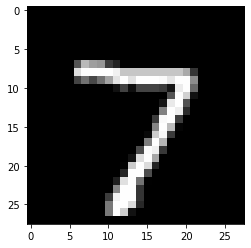

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


<ipython-input-5-474dfbde7e55>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(output)


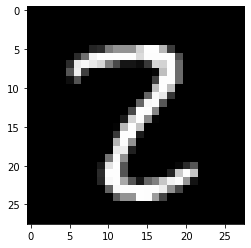

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 6 , Predicted: 6


<ipython-input-5-474dfbde7e55>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(output)


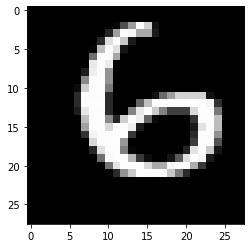

In [ ]:
img, label = test_dataset[1854]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


<ipython-input-5-474dfbde7e55>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(output)


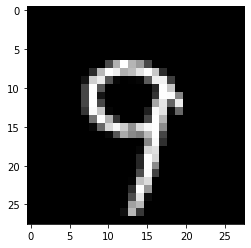

In [ ]:
img, label = test_dataset[2345]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))